In [10]:
from PIL import Image, ImageChops
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import image_slicer as imsl
import numpy as np 
import copy
import random
import cv2

#obj = None

class Puzzle:

    blanco = None
    cuadro_blanco = None
    cuantas = None
    piezas = None
    matrix = None
    img = None
    obj = None
    #objetivo = None
    data = None
    
    def __init__(self):
        self.blanco = 0
        self.cuadro_blanco = []
        self.cuantas = 0
        self.piezas = 0
        self.matrix = []
        self.img = ()  
        self.obj = []
        #self.objetivo = np.array([])
        self.data = ()
        
        
    def estado_original(self):
        plt.rcParams['figure.figsize'] = (10,7)
        plt.imshow(mpimg.imread('imagen.jpg'))

        self.cuantas = int(input('Dimensión de la matriz cuadrada: '))
        self.piezas = self.cuantas*self.cuantas;
        self.matrix = (np.arange(self.piezas)).reshape(self.cuantas, self.cuantas)
        self.data = imsl.slice('imagen.jpg', self.piezas, save=False) # hacer mi slicing
        print(type(self.data))
        self.img = copy.copy(self.data)
        
        a = self.img[-1].image.size[0]
        b = self.img[-1].image.size[1]
        self.cuadro_blanco = np.zeros([b,a,3],dtype=np.uint8)
        self.cuadro_blanco.fill(255)
        self.cuadro_blanco = Image.fromarray(self.cuadro_blanco, 'RGB')
        self.blanco = np.random.randint(self.piezas)
        self.img[self.blanco].image = copy.copy(self.cuadro_blanco) 
        
        # METER UN IMREAD PARA LEER LOS DATOS DE LAS IMAGENES Y COMPARAR CON ESO
        
        #imsl.join(self.img, )
        #for i in self.img:
        #    print(i.image)
        #    self.objetivo = np.append(self.objetivo,i.image)
        
        #self.objetivo = self.objetivo.reshape(self.cuantas, self.cuantas)
        #self.objetivo = cv2.vconcat([cv2.hconcat(i) for i in self.objetivo])
        #cv2.imwrite('objetivo.jpg', im_tile)      
        #self.objetivo = copy.copy(self.img)
        #print(type(self.objetivo))
        #print(type(self.objetivo[0].image))
        self.obj = copy.copy(imsl.join(self.img))
        self.obj = np.array(self.obj)
        cv2.imwrite('objetivo.jpg', self.obj)    
        plt.imshow(self.obj)
        
        self.img = copy.copy(tuple(random.sample(self.img, len(self.img)))) # Desordenado 
        pos = 0 
        for i in self.img:
            diff_ = (ImageChops.difference(i.image, self.cuadro_blanco)).getbbox()
            if diff_ == None:
                self.blanco = pos 
            
            pos = pos + 1
        
    def jugar(self, mover):
        clear_output()
        if mover in self.matrix:
            blanco_f, blanco_c = np.where(self.matrix == self.blanco)
            blanco_f = blanco_f[0]
            blanco_c = blanco_c[0]

            if mover != self.blanco:
                mov_f, mov_c = np.where(self.matrix == mover)
                f_izq = mov_f[0] - 1
                f_der = mov_f[0] + 1
                c_arriba = mov_c[0] - 1
                c_abajo = mov_c[0] + 1

                f_arriba = mov_f[0] - 1
                f_abajo = mov_f[0] + 1
                c_izq = mov_c[0] - 1 
                c_der = mov_c[0] + 1

                if ((blanco_f == mov_f[0]) and ((blanco_c == c_izq) or (blanco_c == c_der))) or ((blanco_c == mov_c[0]) and ((blanco_f == f_arriba) or (blanco_f == f_abajo))):
                    posicion_aux_blanco = copy.copy(self.img[self.blanco].image)
                    self.img[self.blanco].image = copy.copy(self.img[mover].image)
                    self.img[mover].image = copy.copy(posicion_aux_blanco)
                    self.blanco = mover
                    print('Blanco')
                    return blanco
                else:
                    print('Movimiento no permitido')
            else:
                print('No se puede mover la pieza en blanco')
        else:
            print('Elemento no encontrado')
   

    def graficar(self):
        #print(self.blanco)
        fig = plt.figure()
        contador = 0
        print(self.matrix)
        for i in self.img:
            contador = contador + 1
            fig.add_subplot(self.cuantas, self.cuantas, contador) # rows, cols, posicion
            plt.xticks([])
            plt.yticks([])
            plt.imshow(i.image)
            fig.tight_layout(pad=0, w_pad=0., h_pad=0)

        plt.show()




    def proceso(self):
        fin = False
        inicial = False
        
        while fin == False:
            self.graficar()
            mover = int(input('Cuál desea mover: '))
            self.jugar(mover)
            #print(self.objetivo)
            #print(self.img)

            #imagen = imsl.join()
            data_obj= cv2.imread('objetivo.jpg')
            print(data_obj)
            #self.objetivo = Image.open(self.objetivo)
            
            #objetivo = imsl.join(self.objetivo)
            #print('OBJETIVO: ', type(self.objetivo))
            #print('IMG: ', type(imagen))
            
            #c = plt.imshow(imagen)
            #f = plt.imshow(objetivo)
            
            #plt.show()
            plt.imshow(imagen)
            #plt.imshow(self.objetivo)
            diff = (ImageChops.difference(imagen, self.obj)).getbbox()
            print(diff)
            if diff == None and inicial == True:
                fin = True
                print('Logrado')
                
            inicial=True
            
        
puzzle = Puzzle()

Dimensión de la matriz cuadrada: 2
<class 'tuple'>


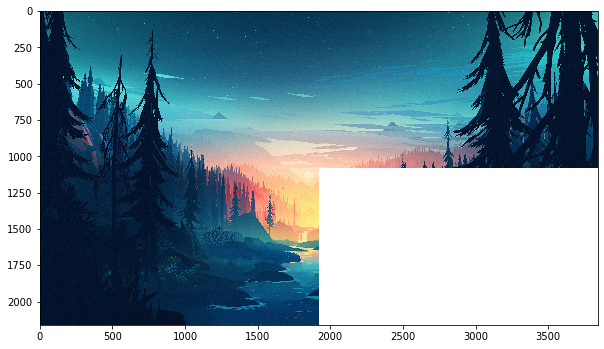

In [11]:
puzzle.estado_original()

In [6]:
puzzle.proceso()

Blanco


SystemError: <built-in function imread> returned NULL without setting an error